# || Digit ||
___
> practice really

In [16]:
import numpy as np
import scipy.special
import matplotlib.pyplot
%matplotlib inline

In [17]:
#defining it

class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learning_rate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.lr = learning_rate
        
        self.wih = (np.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes, self.inodes)))
        self.who = (np.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes)))
        
        
                    
        self.activation_function = lambda x:scipy.special.expit(x)
        
        pass            
        
    
    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list,ndmin=2).T
                    
        hidden_inputs = np.dot(self.wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
                    
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T,output_errors)
        
        self.who += self.lr*np.dot((output_errors*final_outputs*(1-final_outputs)),np.transpose(hidden_outputs))
        self.wih += self.lr*np.dot((hidden_errors*hidden_outputs*(1-hidden_outputs)),np.transpose(inputs))
        
        pass
            
    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T
                    
        hidden_inputs = np.dot(self.wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
                    
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
                    
        return final_outputs

In [18]:
#creating the network

input_nodes = 784
hidden_nodes = 200
output_nodes = 10
learning_rate = 0.1

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)


In [19]:
data_file = open("mnist_train.csv","r")
data_list = data_file.readlines()
data_file.close()

In [20]:
for record in data_list:
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:])/255.0 *0.99)+0.01
    targets = np.zeros(output_nodes)+0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs,targets)
    pass

In [21]:
test_data_file = open("mnist_test.csv","r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [22]:
all_values1 = test_data_list[0].split(',')
all_values1[0]

'7'

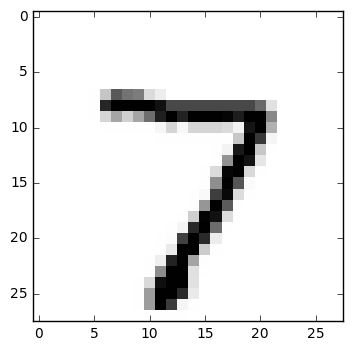

In [8]:
image_array = np.asfarray(all_values1[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap="Greys",interpolation="None")

In [9]:
n.query((np.asfarray(all_values1[1:])/255.0 * 0.99) + 0.01)

array([[ 0.00981296],
       [ 0.00291237],
       [ 0.01382717],
       [ 0.01207517],
       [ 0.00125286],
       [ 0.01440796],
       [ 0.0101734 ],
       [ 0.98560708],
       [ 0.00882559],
       [ 0.00855959]])

In [10]:
len(n.query((np.asfarray(all_values[1:])/255.0*0.99)+0.01))

10

In [11]:
scorecard = []
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    print(correct_label,"correct label")
    inputs = (np.asfarray(all_values[1:])/255.0 *0.99)+0.01
    outputs = n.query(inputs)
    label = np.argmax(outputs)
    print(label,"found answer")
    if(label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass


7 correct label
7 found answer
2 correct label
2 found answer
1 correct label
1 found answer
0 correct label
0 found answer
4 correct label
4 found answer
1 correct label
1 found answer
4 correct label
4 found answer
9 correct label
9 found answer
5 correct label
6 found answer
9 correct label
9 found answer
0 correct label
0 found answer
6 correct label
6 found answer
9 correct label
9 found answer
0 correct label
0 found answer
1 correct label
1 found answer
5 correct label
5 found answer
9 correct label
9 found answer
7 correct label
7 found answer
3 correct label
3 found answer
4 correct label
4 found answer
9 correct label
9 found answer
6 correct label
6 found answer
6 correct label
6 found answer
5 correct label
5 found answer
4 correct label
4 found answer
0 correct label
0 found answer
7 correct label
7 found answer
4 correct label
4 found answer
0 correct label
0 found answer
1 correct label
1 found answer
3 correct label
3 found answer
1 correct label
1 found answer
3 correc

In [12]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [13]:
sum_array = np.asarray(scorecard)
print("performance = ", sum_array.sum()/sum_array.size)

performance =  0.9609
